#Facial Emotion

dataset: https://www.kaggle.com/datasets/mh0386/facial-emotion


## SELECCION Y PREPROCESAMIENTO DEL DATASET

In [1]:
!pip install opencv-python

In [2]:
!pip install tensorflow


### A EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = "/content/drive/MyDrive/modulo10_proyecto2/facial_emotions.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./facial_emotions")
zip_object.close()

In [6]:
from PIL import Image
import cv2
from collections import Counter
import os

plt.style.use('default')
sns.set_palette("husl")

# Definir rutas
base_path = 'facial_emotions'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

In [7]:
emotions = ['Contempt', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised']

In [8]:
# Contar imágenes por emoción en train y test

train_counts = {}
test_counts = {}
total_counts = {}

for emotion in emotions:
    train_emotion_path = os.path.join(train_path, emotion)
    test_emotion_path = os.path.join(test_path, emotion)

    train_count = len([f for f in os.listdir(train_emotion_path) if f.endswith('.jpg')])
    test_count = len([f for f in os.listdir(test_emotion_path) if f.endswith('.jpg')])

    train_counts[emotion] = train_count
    test_counts[emotion] = test_count
    total_counts[emotion] = train_count + test_count

# Crear DataFrame con estadísticas

stats_df = pd.DataFrame({
    'Emotion': emotions,
    'Train': [train_counts[e] for e in emotions],
    'Test': [test_counts[e] for e in emotions],
    'Total': [total_counts[e] for e in emotions]
})

In [9]:
print("\n" + "="*50)
print("1. DISTRIBUCIÓN DE IMÁGENES POR EMOCIÓN:")
print(stats_df)
print(f"\nTotal de imágenes: {stats_df['Total'].sum()}")
print(f"Promedio por emoción: {stats_df['Total'].mean():.1f}")
print(f"Desviación estándar: {stats_df['Total'].std():.1f}")


1. DISTRIBUCIÓN DE IMÁGENES POR EMOCIÓN:
     Emotion  Train  Test  Total
0   Contempt     14     5     19
1      angry     14     5     19
2    disgust     14     5     19
3       fear     14     5     19
4      happy     14     5     19
5    neutral     14     5     19
6        sad     14     5     19
7  surprised     14     5     19

Total de imágenes: 152
Promedio por emoción: 19.0
Desviación estándar: 0.0


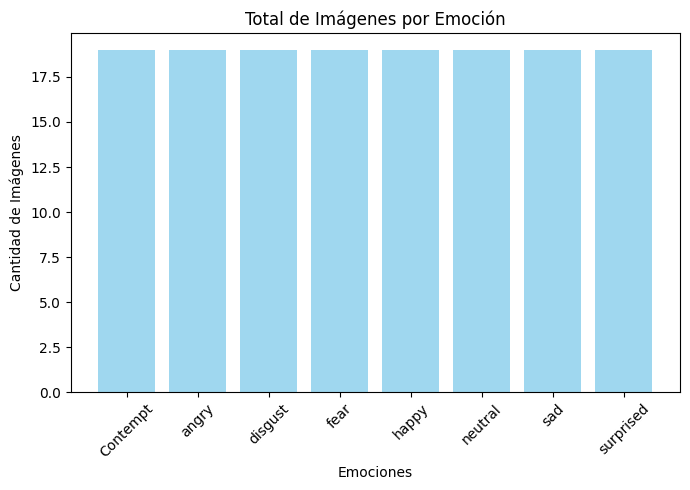

In [10]:
plt.figure(figsize=(7, 5))
plt.bar(stats_df['Emotion'], stats_df['Total'], color='skyblue', alpha=0.8)
plt.title('Total de Imágenes por Emoción')
plt.xlabel('Emociones')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

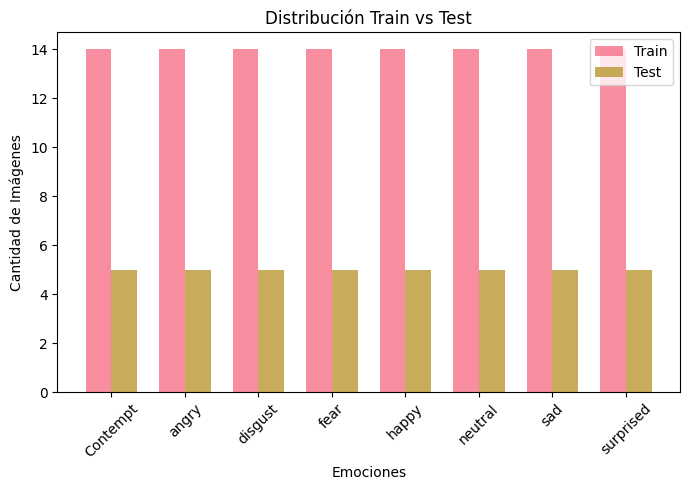

In [11]:
plt.figure(figsize=(7, 5))
x_pos = np.arange(len(emotions))
width = 0.35
plt.bar(x_pos - width/2, stats_df['Train'], width, label='Train', alpha=0.8)
plt.bar(x_pos + width/2, stats_df['Test'], width, label='Test', alpha=0.8)
plt.title('Distribución Train vs Test')
plt.xlabel('Emociones')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(x_pos, emotions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
print("\n" + "="*50)
print("2. ANÁLISIS DE CARACTERÍSTICAS DE IMÁGENES:")

sample_images_info = []
sample_size_per_emotion = 10

for emotion in emotions:
    emotion_path = os.path.join(train_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    for i, img_file in enumerate(image_files[:sample_size_per_emotion]):
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            height, width, channels = img.shape
            file_size = os.path.getsize(img_path) / 1024  # KB
            sample_images_info.append({
                'emotion': emotion,
                'height': height,
                'width': width,
                'channels': channels,
                'file_size_kb': file_size
            })

# Crear DataFrame con información de imágenes
images_df = pd.DataFrame(sample_images_info)

print("Estadísticas de dimensiones de imágenes (muestra):")
print(images_df.groupby('emotion')[['height', 'width', 'file_size_kb']].agg(['min', 'max']).round(2))



2. ANÁLISIS DE CARACTERÍSTICAS DE IMÁGENES:
Estadísticas de dimensiones de imágenes (muestra):
          height       width       file_size_kb         
             min   max   min   max          min      max
emotion                                                 
Contempt     720  5184  1280  3888       144.90  9455.41
angry       2592  4608  1448  3888      1803.58  4825.34
disgust      720  5184  1280  3880       165.51  9542.76
fear         720  3888  1280  3888       149.10  5306.13
happy        720  5184  1280  3888       131.42  8962.37
neutral      720  5184  1280  3888       159.61  8678.89
sad         2592  5184  1448  3888      1610.86  9170.71
surprised   2592  3888  1448  3888      1673.74  4841.95



3. MUESTRAS VISUALES DEL DATASET:


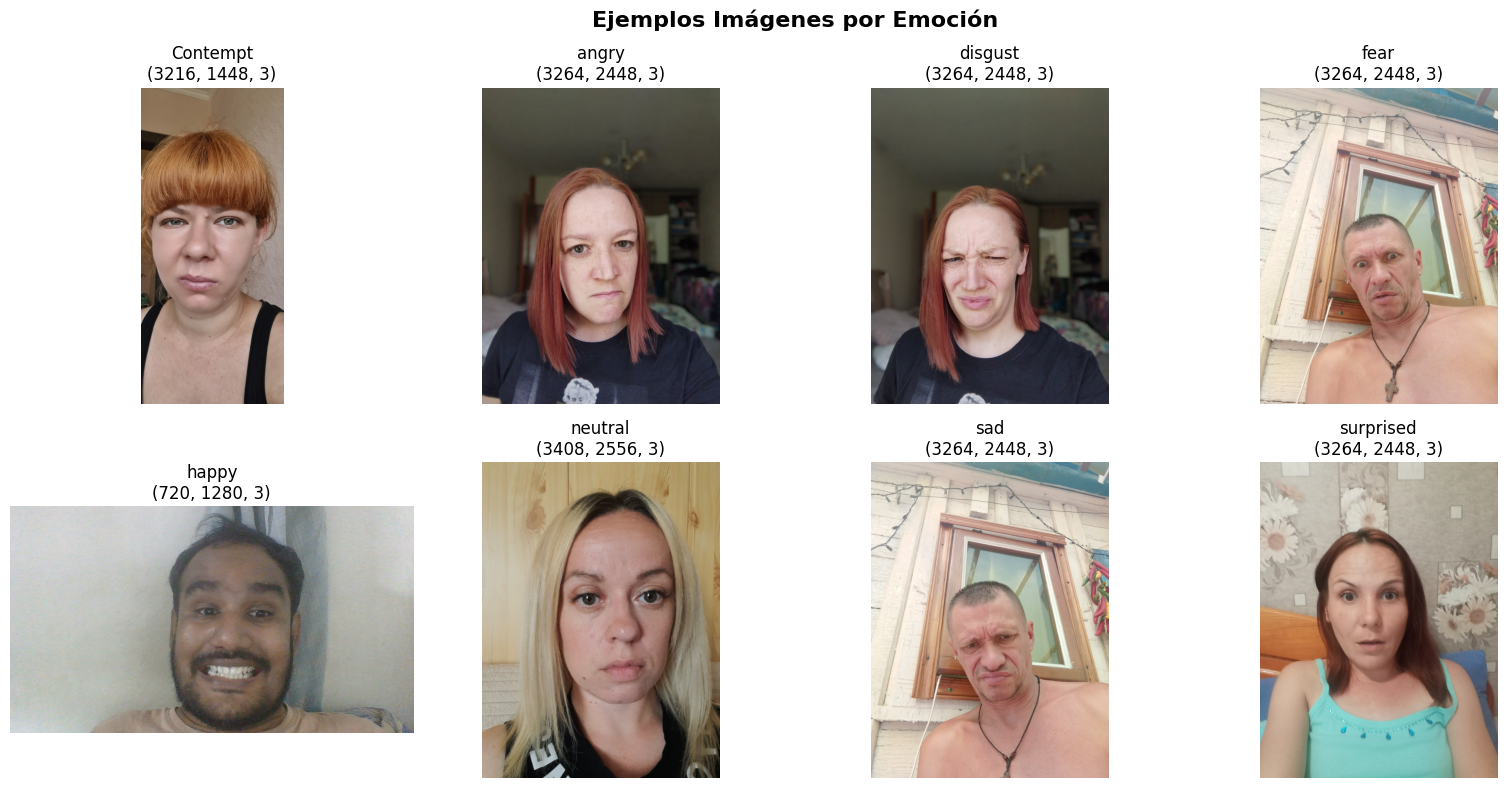

In [13]:
print("\n3. MUESTRAS VISUALES DEL DATASET:")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Ejemplos Imágenes por Emoción', fontsize=16, fontweight='bold')

for idx, emotion in enumerate(emotions):
    emotion_path = os.path.join(train_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    if image_files:
        sample_img_path = os.path.join(emotion_path, image_files[0])
        img = cv2.imread(sample_img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        row = idx // 4
        col = idx % 4
        axes[row, col].imshow(img_rgb)
        axes[row, col].set_title(f'{emotion}\n{img_rgb.shape}')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [14]:
print("\n" + "="*50)
print("4. ANÁLISIS DE BALANCE DEL DATASET:")

# Calcular métricas de balance
total_images = stats_df['Total'].sum()
min_count = stats_df['Total'].min()
max_count = stats_df['Total'].max()
balance_ratio = min_count / max_count

print(f"Clase con menos imágenes: {stats_df.loc[stats_df['Total'].idxmin(), 'Emotion']} ({min_count} imágenes)")
print(f"Clase con más imágenes: {stats_df.loc[stats_df['Total'].idxmax(), 'Emotion']} ({max_count} imágenes)")
print(f"Ratio de balance: {balance_ratio:.3f}")

if balance_ratio > 0.8:
    print("✓ Dataset bien balanceado")
elif balance_ratio > 0.5:
    print("⚠ Dataset moderadamente desbalanceado")
else:
    print("✗ Dataset altamente desbalanceado - considerar técnicas de balanceo")



4. ANÁLISIS DE BALANCE DEL DATASET:
Clase con menos imágenes: Contempt (19 imágenes)
Clase con más imágenes: Contempt (19 imágenes)
Ratio de balance: 1.000
✓ Dataset bien balanceado


In [15]:
print("\n" + "="*50)
print("5. CARGANDO DATASET COMPLETO...")

# Cargar todas las imágenes y etiquetas
all_images = []
all_labels = []
all_emotion_names = []

# Mapeo de emociones a números
emotion_to_id = {emotion: idx for idx, emotion in enumerate(emotions)}

# Cargar datos de entrenamiento
print("Cargando datos de entrenamiento...")
for emotion in emotions:
    emotion_path = os.path.join(train_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    for img_file in image_files:
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)  # Cargar en COLOR (3 canales)
        if img is not None:
            # Redimensionar a 224x224 (tamaño requerido por ResNet50)
            img_resized = cv2.resize(img, (128, 128))
            # Convertir BGR a RGB
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            all_images.append(img_rgb)
            all_labels.append(emotion_to_id[emotion])
            all_emotion_names.append(emotion)


5. CARGANDO DATASET COMPLETO...
Cargando datos de entrenamiento...


In [16]:
# Cargar datos de prueba
print("Cargando datos de prueba...")
for emotion in emotions:
    emotion_path = os.path.join(test_path, emotion)
    image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]

    for img_file in image_files:
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)  # Cargar en COLOR (3 canales)
        if img is not None:
            # Redimensionar a 224x224 (tamaño requerido por ResNet50)
            img_resized = cv2.resize(img, (128, 128))
            # Convertir BGR a RGB
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            all_images.append(img_rgb)
            all_labels.append(emotion_to_id[emotion])
            all_emotion_names.append(emotion)

Cargando datos de prueba...


In [17]:
# Convertir a arrays numpy
#X = np.array(all_images).astype('float32') / 255.0  # Normalizar
X = np.array(all_images).astype('float32')
y = np.array(all_labels)
emotion_names_array = np.array(all_emotion_names)

print(f"Dataset cargado: {X.shape[0]} imágenes de {X.shape[1]}x{X.shape[2]} píxeles")
print(f"Rango de valores: [{X.min():.3f}, {X.max():.3f}]")

Dataset cargado: 152 imágenes de 128x128 píxeles
Rango de valores: [0.000, 255.000]


In [18]:
print("\n6. ANÁLISIS DE CARACTERÍSTICAS DE PÍXELES (luminosidad):")

# Calcular estadísticas por emoción
pixel_stats = {}
for emotion in emotions:
    emotion_mask = emotion_names_array == emotion
    emotion_images = X[emotion_mask]

    pixel_stats[emotion] = {
        'mean_intensity': emotion_images.mean(),
        'std_intensity': emotion_images.std(),
        'min_intensity': emotion_images.min(),
        'max_intensity': emotion_images.max()
    }

# Crear DataFrame con estadísticas de píxeles
pixel_df = pd.DataFrame(pixel_stats).T
print("Estadísticas de intensidad de píxeles por emoción:")
print(pixel_df.round(4))


6. ANÁLISIS DE CARACTERÍSTICAS DE PÍXELES (luminosidad):
Estadísticas de intensidad de píxeles por emoción:
           mean_intensity  std_intensity  min_intensity  max_intensity
Contempt       135.050797      66.102699            0.0          255.0
angry          135.788300      65.281403            0.0          255.0
disgust        137.667999      66.226997            0.0          255.0
fear           134.453400      65.999199            0.0          255.0
happy          134.579697      65.974800            0.0          255.0
neutral        136.327606      65.060699            0.0          255.0
sad            135.081604      66.558800            0.0          255.0
surprised      132.964996      65.854202            0.0          255.0


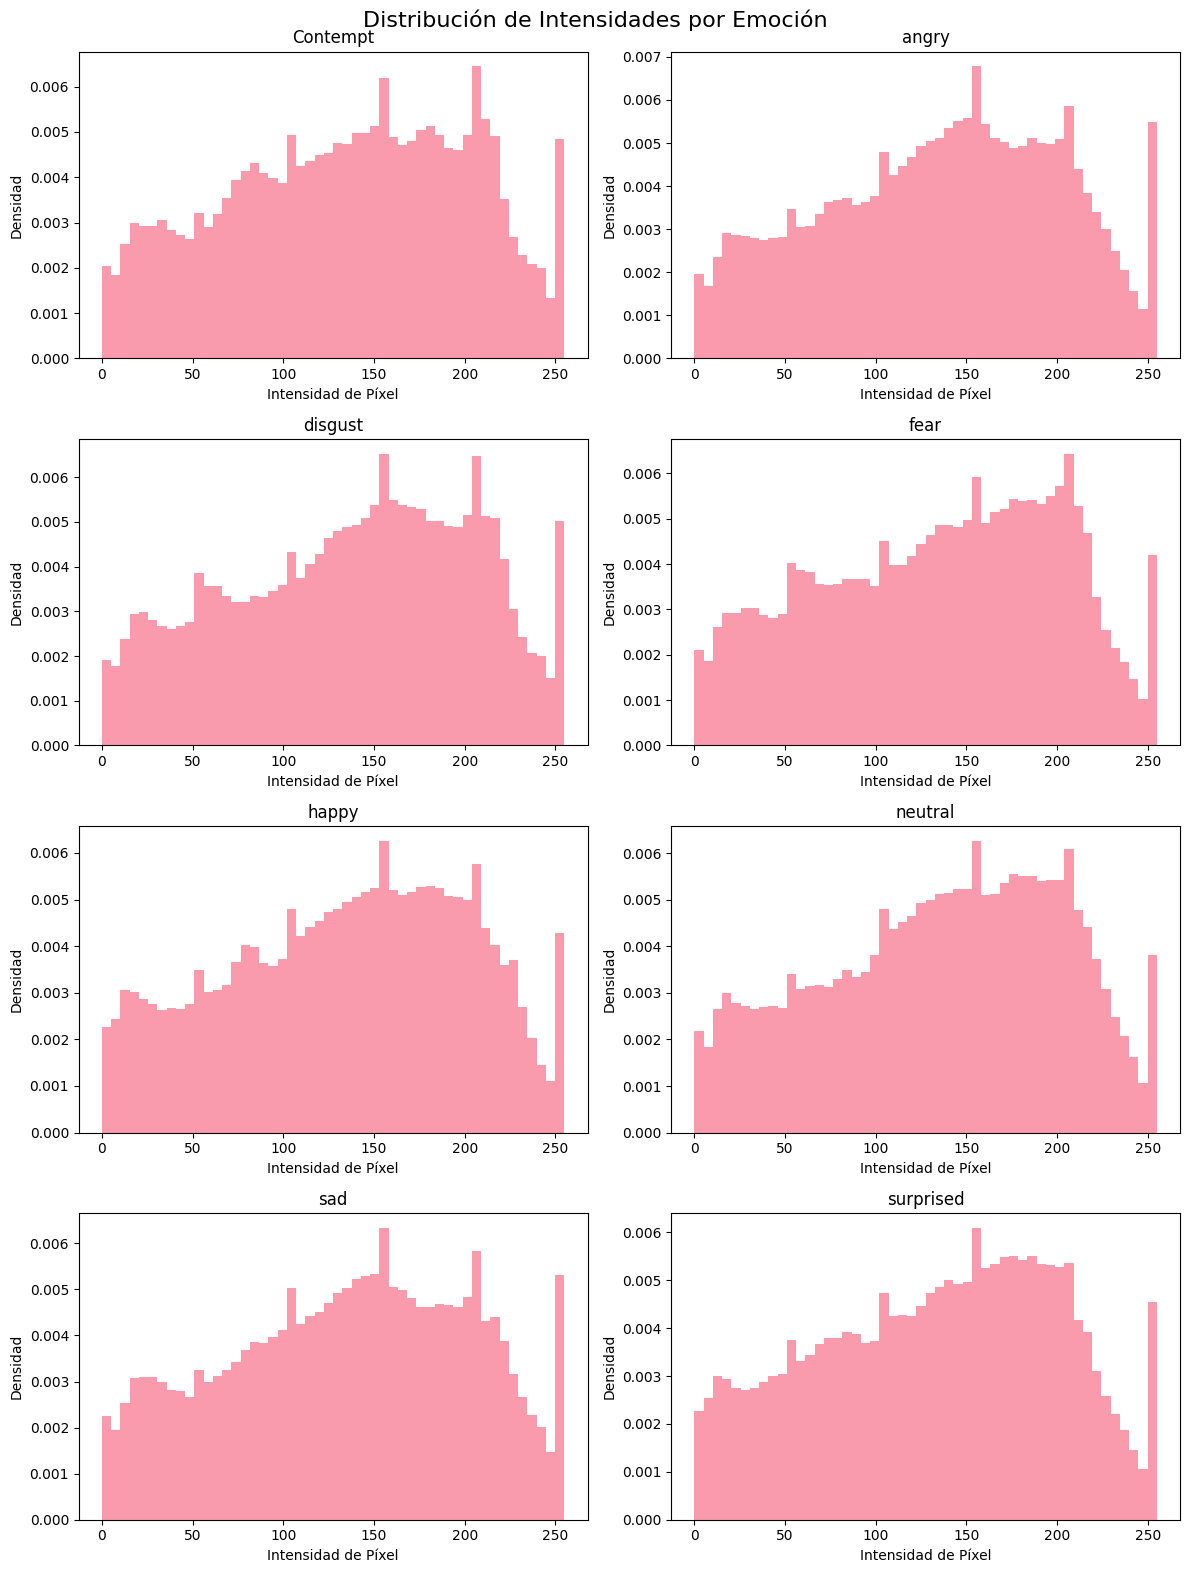

In [19]:
# Visualizar distribución de intensidades
#fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('Distribución de Intensidades por Emoción', fontsize=16)

for idx, emotion in enumerate(emotions):
    emotion_mask = emotion_names_array == emotion
    emotion_images = X[emotion_mask]

    # row = idx // 4
    # col = idx % 4

    row = idx // 2
    col = idx % 2

    # Histograma de intensidades
    axes[row, col].hist(emotion_images.flatten(), bins=50, alpha=0.7, density=True)
    axes[row, col].set_title(f'{emotion}')
    axes[row, col].set_xlabel('Intensidad de Píxel')
    axes[row, col].set_ylabel('Densidad')

plt.tight_layout()
plt.show()

In [20]:
print("\n" + "="*50)
print("7. DIVISIÓN DEL DATASET (70% - 30%):")

from sklearn.model_selection import train_test_split

# Primera división: 80% entrenamiento, 20% temporal
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


7. DIVISIÓN DEL DATASET (70% - 30%):


In [21]:
# Mostrar información de la división
print(f"Conjunto de entrenamiento: {X_train.shape[0]} imágenes ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} imágenes ({X_test.shape[0]/len(X)*100:.1f}%)")

Conjunto de entrenamiento: 106 imágenes (69.7%)
Conjunto de prueba: 46 imágenes (30.3%)


In [22]:
# Verificar distribución por clase en cada conjunto
train_dist = Counter(y_train)
test_dist = Counter(y_test)

division_df = pd.DataFrame({
    'Emotion': emotions,
    'Train': [train_dist[i] for i in range(len(emotions))],
    'Test': [test_dist[i] for i in range(len(emotions))]
})

print("\nDistribución por emoción en cada conjunto:")
print(division_df)


Distribución por emoción en cada conjunto:
     Emotion  Train  Test
0   Contempt     13     6
1      angry     14     5
2    disgust     13     6
3       fear     13     6
4      happy     13     6
5    neutral     14     5
6        sad     13     6
7  surprised     13     6


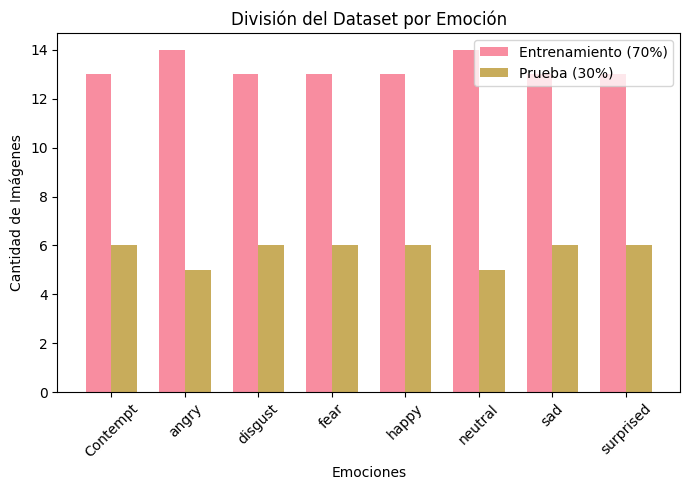

In [23]:
# Visualizar la división
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# x_pos = np.arange(len(emotions))
# width = 0.25

# ax.bar(x_pos - width/2, division_df['Train'], width, label='Entrenamiento (70%)', alpha=0.8)
# ax.bar(x_pos + width/2, division_df['Test'], width, label='Prueba (30%)', alpha=0.8)

# ax.set_title('División del Dataset por Emoción')
# ax.set_xlabel('Emociones')
# ax.set_ylabel('Número de Imágenes')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(emotions, rotation=45)
# ax.legend()

# plt.tight_layout()
# plt.show()



plt.figure(figsize=(7, 5))
x_pos = np.arange(len(emotions))
width = 0.35
plt.bar(x_pos - width/2, division_df['Train'], width, label='Entrenamiento (70%)', alpha=0.8)
plt.bar(x_pos + width/2, division_df['Test'], width, label='Prueba (30%)', alpha=0.8)
plt.title('División del Dataset por Emoción')
plt.xlabel('Emociones')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(x_pos, emotions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
print("\n" + "="*50)
print("8. PREPARACIÓN FINAL PARA CNN:")

# Redimensionar para CNN (agregar dimensión de canal)
# X_train_cnn = X_train.reshape(X_train.shape[0], 48, 48, 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], 48, 48, 1)

X_train_cnn = X_train  # Ya está en forma (n, 224, 224, 3)
X_test_cnn = X_test    # Ya está en forma (n, 224, 224, 3)

#X_train_cnn = np.array([cv2.resize(img, (128, 128)) for img in X_train]).astype('float32')
#X_test_cnn = np.array([cv2.resize(img, (128, 128)) for img in X_test]).astype('float32')

# X_train_cnn = X_train.reshape(X_train.shape[0], 128, 128, 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], 128, 128, 1)

print(f"Forma de datos de entrenamiento para CNN: {X_train_cnn.shape}")
print(f"Forma de datos de prueba para CNN: {X_test_cnn.shape}")




8. PREPARACIÓN FINAL PARA CNN:
Forma de datos de entrenamiento para CNN: (106, 128, 128, 3)
Forma de datos de prueba para CNN: (46, 128, 128, 3)


In [25]:
# Aplicar preprocesamiento específico de ResNet50

#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


X_train_cnn = preprocess_input(X_train_cnn)
X_test_cnn = preprocess_input(X_test_cnn)

4


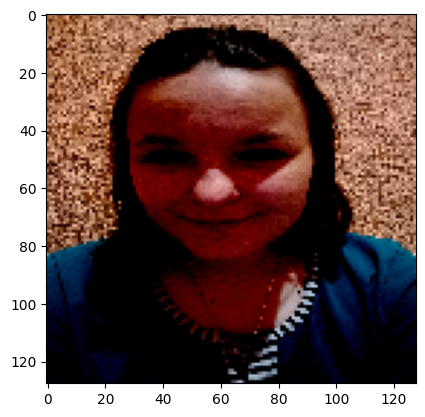

In [26]:
i = 3
plt.imshow(X_train[i])
print(y_train[i])

In [27]:
# Convertir etiquetas a categorical (one-hot encoding)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convertir a one-hot
y_train_categorical = to_categorical(y_train, num_classes=len(emotions))
y_test_categorical = to_categorical(y_test, num_classes=len(emotions))

print(f"Forma de etiquetas (one-hot): {y_train_categorical.shape}")
print(f"Número de clases: {len(emotions)}")

Forma de etiquetas (one-hot): (106, 8)
Número de clases: 8


## Entrenamiento del modelo

In [28]:
import tensorflow as tf
#from tensorflow.keras.applications import ResNet50

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import time

In [29]:
# Configurar GPU si está disponible
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

GPU disponible: []


In [30]:
# Configurar semilla para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)


In [31]:
# Configuración de 5-fold CV
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para almacenar resultados de cada fold
fold_accuracies = []
fold_val_accuracies = []
fold_histories = []
fold_predictions = []
fold_true_labels = []
fold_losses = []
best_models = []

In [32]:
# Configuración del modelo
#img_height, img_width = 224, 224
img_height, img_width = 128, 128
num_classes = len(emotions)
batch_size = 16
epochs = 50

In [33]:
print(f"Configuración del entrenamiento:")
print(f"- Folds: {n_folds}")
print(f"- Epochs por fold: {epochs}")
print(f"- Batch size: {batch_size}")
print(f"- Clases: {num_classes}")
print(f"- Tamaño de imagen: {img_height}x{img_width}")

Configuración del entrenamiento:
- Folds: 5
- Epochs por fold: 50
- Batch size: 16
- Clases: 8
- Tamaño de imagen: 128x128



==================== FOLD 1/5 ====================
Entrenamiento: 84 muestras
Validación: 22 muestras
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 765ms/step - accuracy: 0.1096 - loss: 3.4500 - val_accuracy: 0.1364 - val_loss: 2.3158 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.2411 - loss: 2.5879 - val_accuracy: 0.1364 - val_loss: 2.4484 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.2746 - loss: 2.4996 - val_accuracy: 0.1364 - val_loss: 2.5164 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.3378 - loss: 2.2795 - val_accuracy: 0.1364 - val_loss: 2.6496 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.3474 - loss: 2.0928 - val_accuracy: 0.0909 - val_loss: 2.8109 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.2997 - loss: 2.0258 - val_accuracy: 0.0455 - val_loss: 2.8908 - learning_rate: 0.0

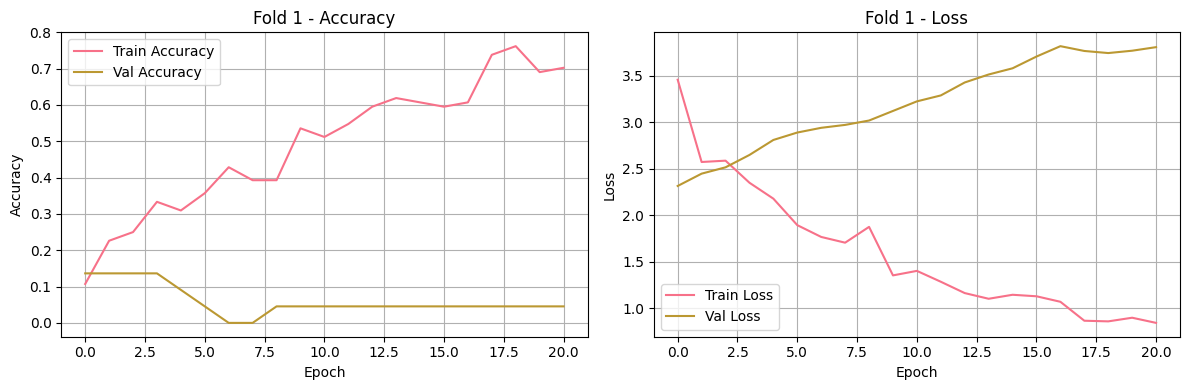

EVALUACION
Fold 1 - accuracy entrenamiento: 0.1429
Fold 1 - accuracy validación: 0.1364


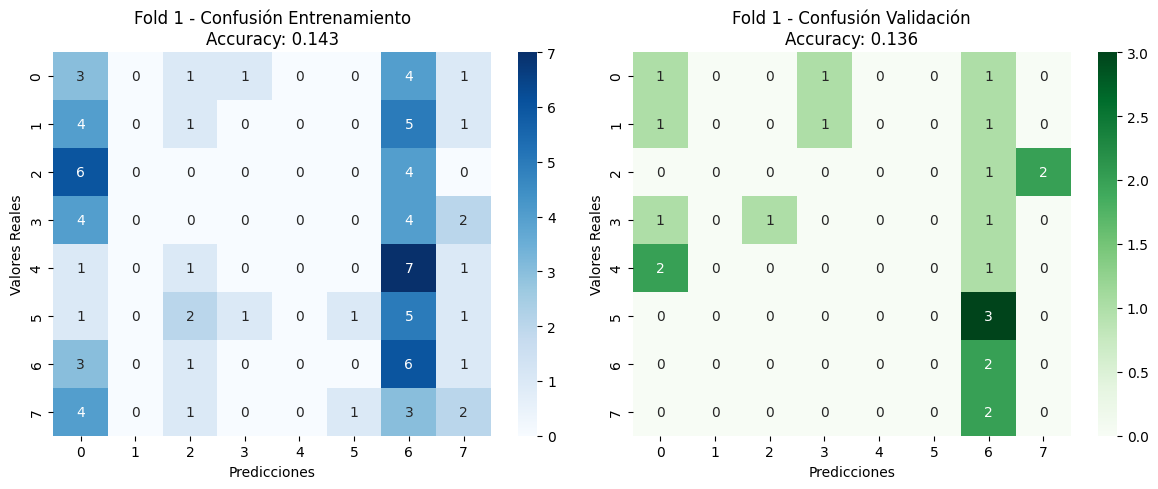


==================== FOLD 2/5 ====================
Entrenamiento: 85 muestras
Validación: 21 muestras
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 720ms/step - accuracy: 0.0587 - loss: 3.3905 - val_accuracy: 0.1429 - val_loss: 2.4918 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.2754 - loss: 2.0786 - val_accuracy: 0.1429 - val_loss: 2.7690 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.2869 - loss: 1.8990 - val_accuracy: 0.0952 - val_loss: 3.1280 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.2376 - loss: 2.1053 - val_accuracy: 0.0952 - val_loss: 3.3312 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.2409 - loss: 2.1033 - val_accuracy: 0.0952 - val_loss: 3.4200 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.4343 - loss: 1.5750 - val_accuracy: 0.0476 - val_loss: 3.5094 - learning_rate: 0.0

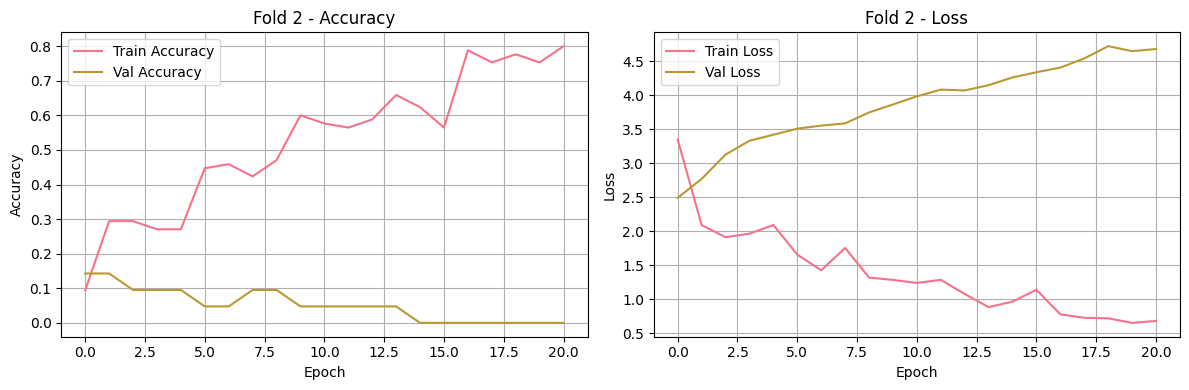

EVALUACION
Fold 2 - accuracy entrenamiento: 0.1529
Fold 2 - accuracy validación: 0.1429


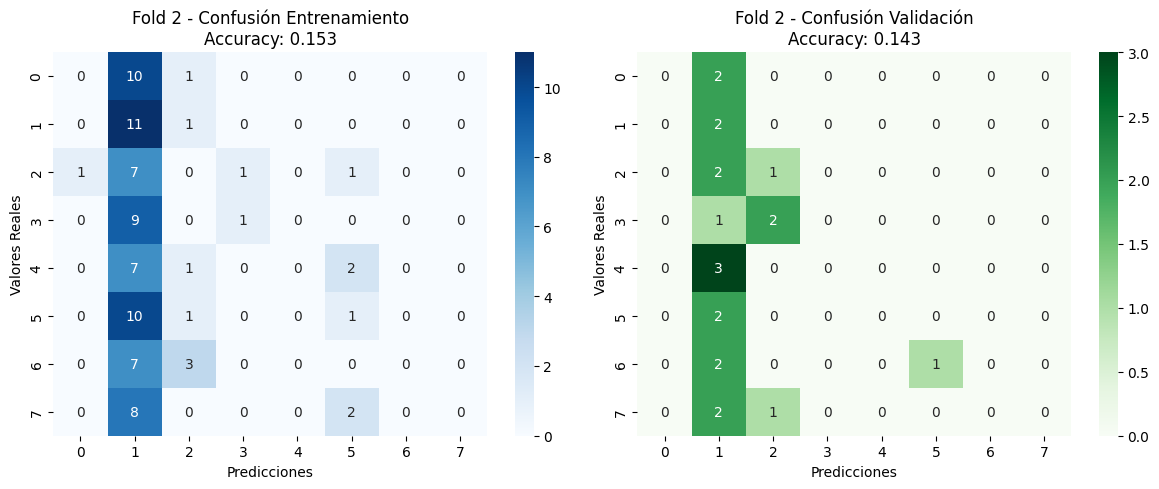


==================== FOLD 3/5 ====================
Entrenamiento: 85 muestras
Validación: 21 muestras
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 633ms/step - accuracy: 0.0818 - loss: 3.3547 - val_accuracy: 0.0476 - val_loss: 2.3133 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.2178 - loss: 2.6592 - val_accuracy: 0.0000e+00 - val_loss: 2.4649 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.2786 - loss: 2.2940 - val_accuracy: 0.0476 - val_loss: 2.7366 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.3679 - loss: 2.0326 - val_accuracy: 0.0000e+00 - val_loss: 2.9609 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.2636 - loss: 2.0209 - val_accuracy: 0.0476 - val_loss: 3.2227 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.3977 - loss: 1.7576 - val_accuracy: 0.0476 - val_loss: 3.3783 - learning_r

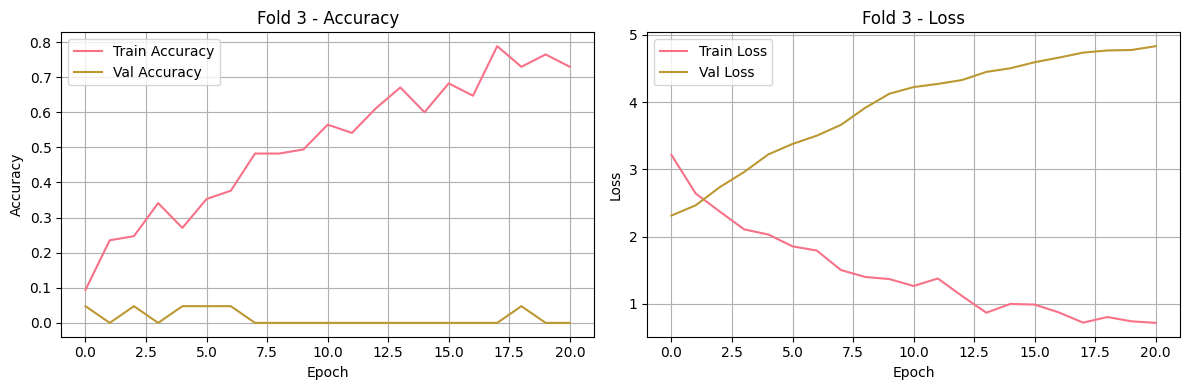

EVALUACION
Fold 3 - accuracy entrenamiento: 0.1529
Fold 3 - accuracy validación: 0.0476


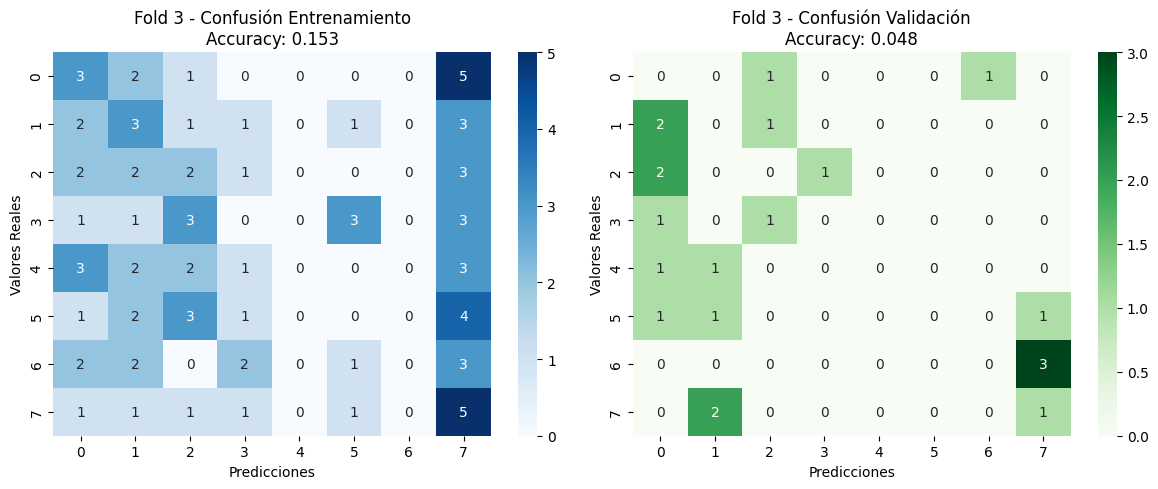


==================== FOLD 4/5 ====================
Entrenamiento: 85 muestras
Validación: 21 muestras
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.1754 - loss: 3.0095 - val_accuracy: 0.0952 - val_loss: 2.3938 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.1820 - loss: 2.8186 - val_accuracy: 0.0952 - val_loss: 2.5956 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.3183 - loss: 2.3069 - val_accuracy: 0.1429 - val_loss: 2.7806 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.3158 - loss: 2.3300 - val_accuracy: 0.1429 - val_loss: 2.9327 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.3212 - loss: 1.9258 - val_accuracy: 0.1429 - val_loss: 3.1199 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.4206 - loss: 1.5897 - val_accuracy: 0.1429 - val_loss: 3.3311 - learning_rate: 0.0

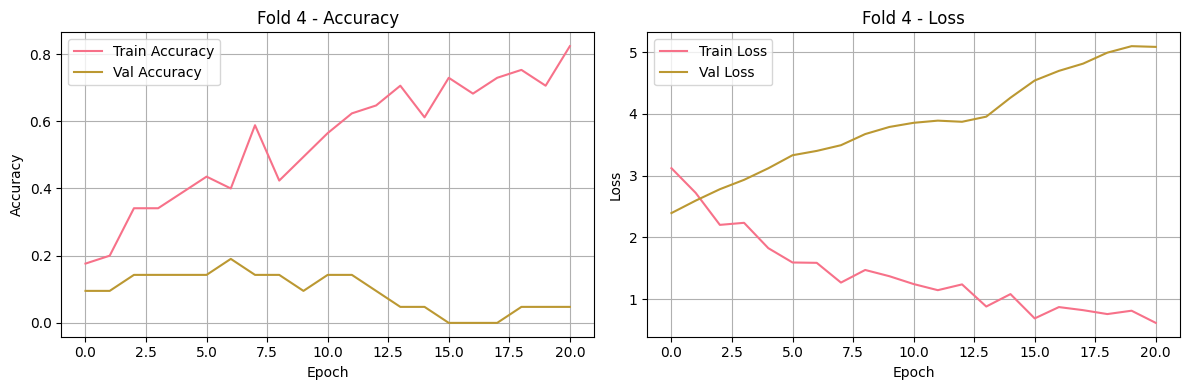

EVALUACION
Fold 4 - accuracy entrenamiento: 0.1765
Fold 4 - accuracy validación: 0.0952


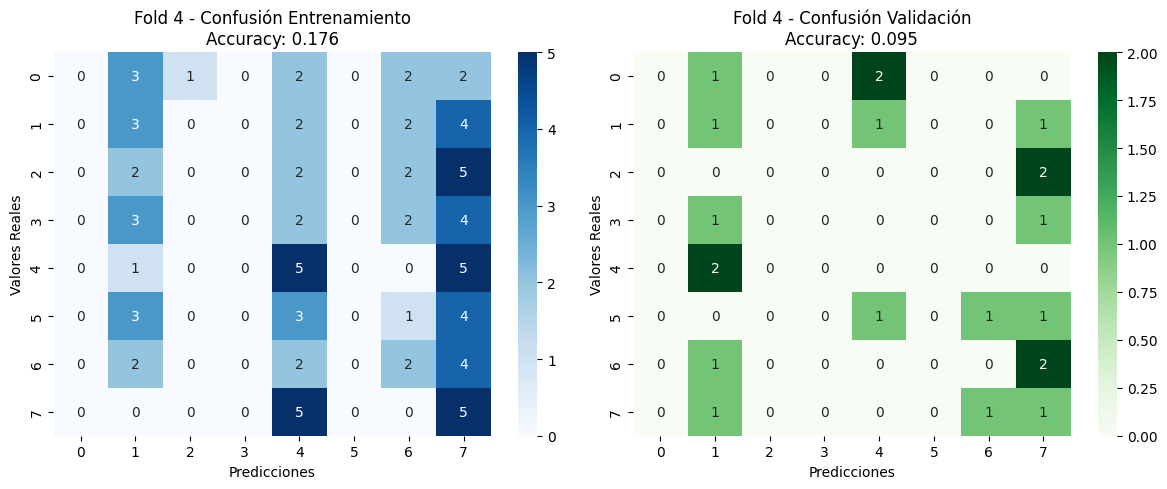


==================== FOLD 5/5 ====================
Entrenamiento: 85 muestras
Validación: 21 muestras
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 626ms/step - accuracy: 0.1224 - loss: 2.9909 - val_accuracy: 0.1905 - val_loss: 2.3492 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.1807 - loss: 2.6018 - val_accuracy: 0.0952 - val_loss: 2.4835 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.4149 - loss: 2.0891 - val_accuracy: 0.0476 - val_loss: 2.7017 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.2572 - loss: 2.0501 - val_accuracy: 0.0476 - val_loss: 2.9550 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 0.3695 - loss: 1.8355 - val_accuracy: 0.0000e+00 - val_loss: 3.1479 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.3619 - loss: 1.8748 - val_accuracy: 0.0476 - val_loss: 3.2362 - learning_rate:

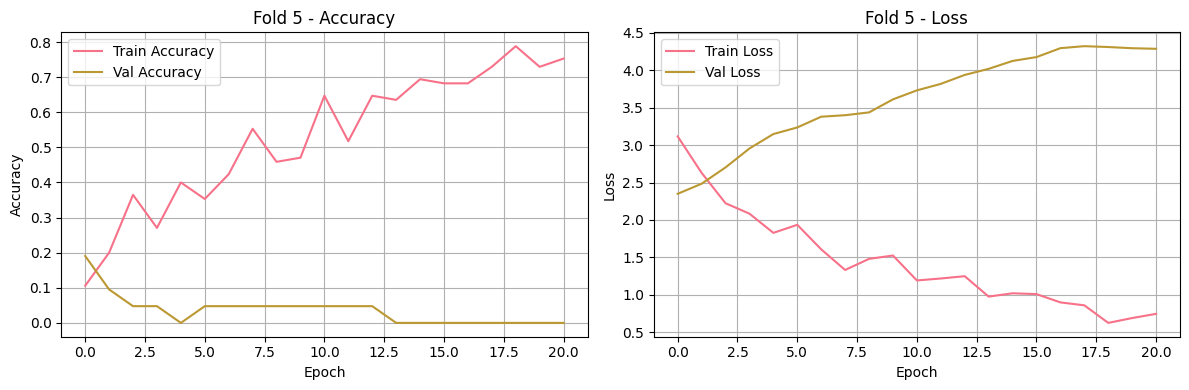

EVALUACION
Fold 5 - accuracy entrenamiento: 0.1647
Fold 5 - accuracy validación: 0.1905


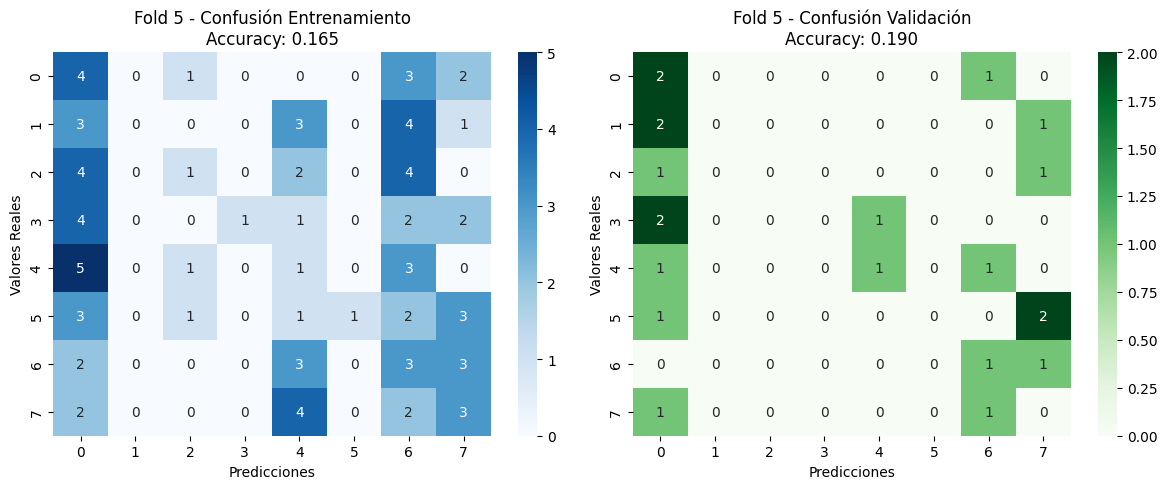

In [34]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization

# Comenzar entrenamiento con CV
start_time = time.time()

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_cnn, y_train)):
    print(f"\n{'='*20} FOLD {fold+1}/{n_folds} {'='*20}")

    # Dividir datos para este fold
    X_fold_train, X_fold_val = X_train_cnn[train_idx], X_train_cnn[val_idx]
    y_fold_train, y_fold_val = y_train_categorical[train_idx], y_train_categorical[val_idx]

    print(f"Entrenamiento: {X_fold_train.shape[0]} muestras")
    print(f"Validación: {X_fold_val.shape[0]} muestras")

    # Crear modelo base ResNet50
    # base_model = ResNet50(
    #     weights='imagenet',
    #     include_top=False,
    #     input_shape=(img_height, img_width, 3)
    # )

    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(img_height, img_width, 3),
        alpha=1.0  # Factor de ancho del modelo (1.0 = modelo completo)
    )

    # Congelar las capas base inicialmente
    base_model.trainable = False

    # Agregar capas personalizadas
    inputs = tf.keras.Input(shape=(img_height, img_width, 3))
    x = base_model(inputs, training=False)

    # x = tf.keras.layers.RandomFlip("horizontal")(inputs)
    # x = tf.keras.layers.RandomRotation(0.1)(x)
    # x = tf.keras.layers.RandomZoom(0.1)(x)


    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)  # Menos dropout


    #x = Flatten()(x)

    # x = Dense(1024, activation='relu')(x)  # Menos neuronas
    # x = Dropout(0.3)(x)

    x = Dense(512, activation='relu')(x)  # Menos neuronas
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Compilar modelo
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=20,
        min_lr=0.0001,
        verbose=1
    )


    # Descongelar algunas capas para fine-tuning
    base_model.trainable = True

    for layer in base_model.layers[:150]:
        layer.trainable = False

    #print(f"Fine-tuning desde la capa 150...")

    # Recompilar con learning rate más bajo
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Continuar entrenamiento con fine-tuning
    history_fine = model.fit(
        X_fold_train, y_fold_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_fold_val, y_fold_val),
        callbacks=[early_stopping, reduce_lr],
        #callbacks=[early_stopping],
        verbose=1
    )


    # Visualizar curvas de entrenamiento para este fold
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
    plt.plot(history_fine.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Fold {fold + 1} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_fine.history['loss'], label='Train Loss')
    plt.plot(history_fine.history['val_loss'], label='Val Loss')
    plt.title(f'Fold {fold + 1} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Evaluar modelo en el fold de validación
    val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    train_loss, train_accuracy = model.evaluate(X_fold_train, y_fold_train, verbose=0)

    print(f"EVALUACION")
    print(f"Fold {fold+1} - accuracy entrenamiento: {train_accuracy:.4f}")
    print(f"Fold {fold+1} - accuracy validación: {val_accuracy:.4f}")

    # Predicciones para este fold
    val_predictions = model.predict(X_fold_val, verbose=0)
    val_pred_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = np.argmax(y_fold_val, axis=1)




    # Almacenar resultados
    fold_accuracies.append(train_accuracy)
    fold_losses.append(val_loss)
    fold_val_accuracies.append(val_accuracy)
    fold_histories.append(history_fine)
    fold_predictions.extend(val_pred_classes)
    fold_true_labels.extend(val_true_classes)

    best_models.append(model)

    # Limpiar memoria
    #del model, base_model
    #tf.keras.backend.clear_session()

    # Predicciones para este fold
    val_predictions = model.predict(X_fold_val, verbose=0)
    val_pred_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = np.argmax(y_fold_val, axis=1)

    train_predictions = model.predict(X_fold_train, verbose=0)
    train_pred_classes = np.argmax(train_predictions, axis=1)
    train_true_classes = np.argmax(y_fold_train, axis=1)

    # NUEVAS GRÁFICAS DE EVALUACIÓN
    # 1. Matrices de Confusión


    plt.figure(figsize=(12, 5))

    # Matriz de confusión para entrenamiento
    plt.subplot(1, 2, 1)
    cm_train = confusion_matrix(train_true_classes, train_pred_classes)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Fold {fold+1} - Confusión Entrenamiento\nAccuracy: {train_accuracy:.3f}')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')

    # Matriz de confusión para validación
    plt.subplot(1, 2, 2)
    cm_val = confusion_matrix(val_true_classes, val_pred_classes)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Fold {fold+1} - Confusión Validación\nAccuracy: {val_accuracy:.3f}')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')

    plt.tight_layout()
    plt.show()

In [35]:
print(f"\nPrecisiones por fold:")
for i, (train_acc, val_acc) in enumerate(zip(fold_accuracies, fold_val_accuracies)):
    print(f"Fold {i+1}: Train={train_acc:.4f}, Val={val_acc:.4f}")


Precisiones por fold:
Fold 1: Train=0.1429, Val=0.1364
Fold 2: Train=0.1529, Val=0.1429
Fold 3: Train=0.1529, Val=0.0476
Fold 4: Train=0.1765, Val=0.0952
Fold 5: Train=0.1647, Val=0.1905


/tmp/ipython-input-4000779793.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


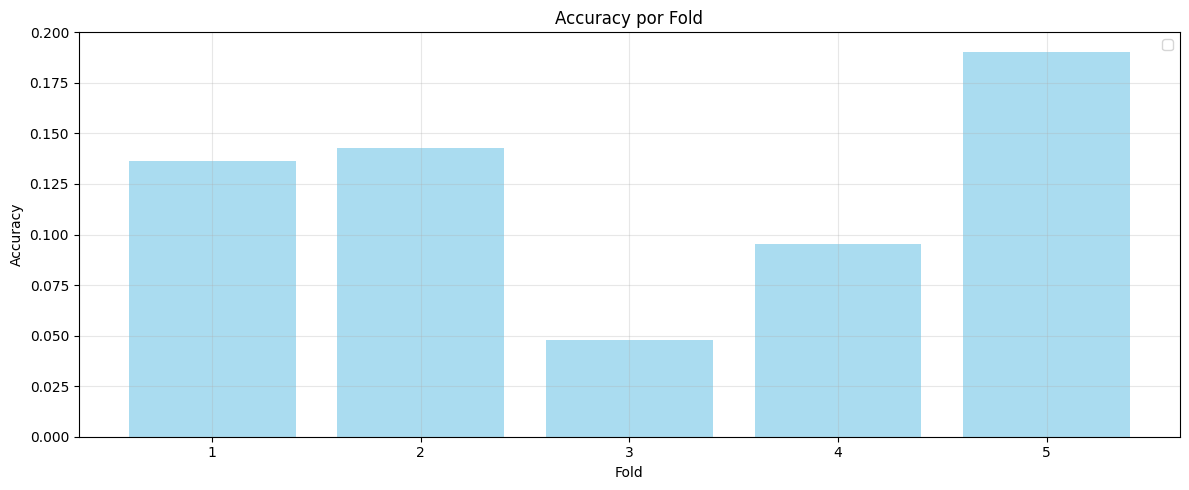

In [36]:
results_df = pd.DataFrame({
    'Fold': range(1, 6),
    'Accuracy': fold_val_accuracies,
    'Loss': fold_losses
})

# Visualizar resultados de CV
plt.figure(figsize=(12, 5))

plt.bar(results_df['Fold'], results_df['Accuracy'], alpha=0.7, color='skyblue')
#plt.axhline(y=fold_val_accuracies.mean(), color='red', linestyle='--',
            #label=f'Promedio: {fold_val_accuracies.mean():.3f}')
plt.title('Accuracy por Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3263664413.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


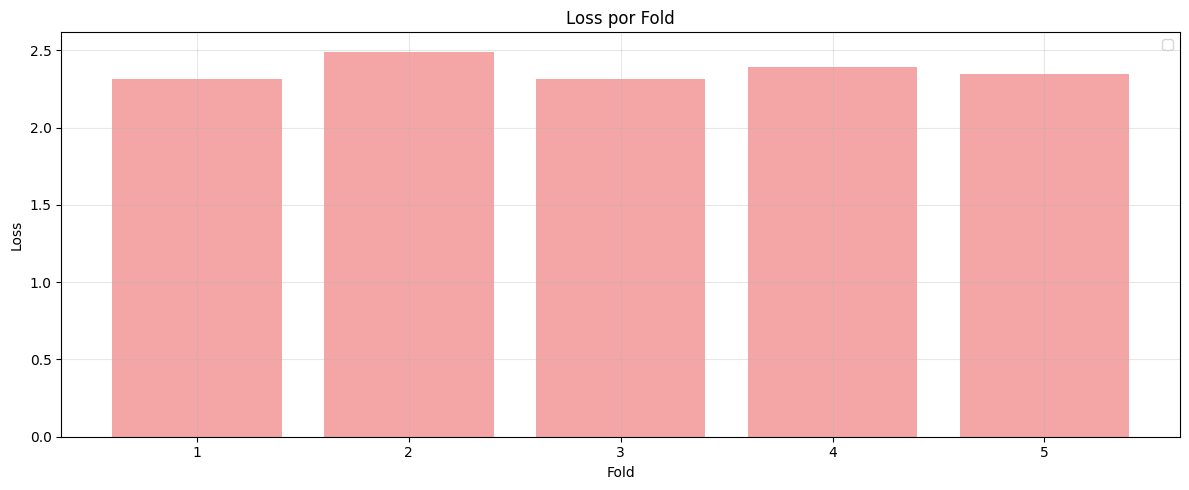

In [37]:
plt.figure(figsize=(12, 5))
plt.bar(results_df['Fold'], results_df['Loss'], alpha=0.7, color='lightcoral')
#plt.axhline(y=fold_losses.mean(), color='red', linestyle='--',
#            label=f'Promedio: {fold_losses.mean():.3f}')
plt.title('Loss por Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [38]:
# Seleccionar el mejor modelo
best_fold_idx = np.argmax(fold_accuracies)
best_model = best_models[best_fold_idx]
print(f"\nMejor modelo: Fold {best_fold_idx + 1} con accuracy {fold_accuracies[best_fold_idx]:.4f}")



Mejor modelo: Fold 4 con accuracy 0.1765


In [39]:
# Evaluar modelo final
test_loss, test_accuracy = best_model.evaluate(X_test_cnn, y_test_categorical, verbose=0)
print(f"Precisión en conjunto de prueba: {test_accuracy:.4f}")

Precisión en conjunto de prueba: 0.1304


In [40]:
# Predicciones finales
test_predictions = best_model.predict(X_test_cnn, verbose=0)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(y_test_categorical, axis=1)

In [41]:

# Reporte final
print("\nReporte de clasificación final:")
print(classification_report(test_true_classes, test_pred_classes, target_names=emotions))


Reporte de clasificación final:
              precision    recall  f1-score   support

    Contempt       0.00      0.00      0.00         6
       angry       0.11      0.20      0.14         5
     disgust       0.00      0.00      0.00         6
        fear       0.00      0.00      0.00         6
       happy       0.11      0.17      0.13         6
     neutral       0.00      0.00      0.00         5
         sad       0.33      0.17      0.22         6
   surprised       0.12      0.50      0.20         6

    accuracy                           0.13        46
   macro avg       0.09      0.13      0.09        46
weighted avg       0.09      0.13      0.09        46



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


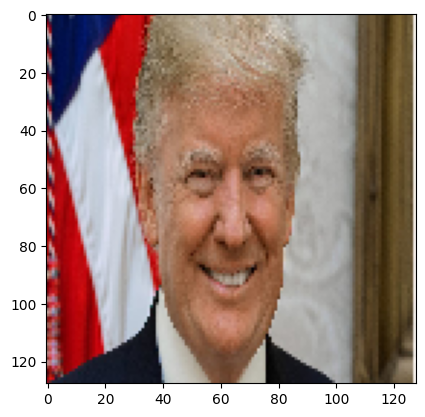

In [42]:
sample_image3 = tf.keras.preprocessing.image.load_img(r'/content/R.jpeg', target_size=(128,128))
plt.imshow(sample_image3)


In [43]:
sample_image3 = tf.keras.preprocessing.image.img_to_array(sample_image3)
sample_image3 = np.expand_dims(sample_image3, axis =0)
sample_image3 = preprocess_input(sample_image3)
prediction = best_model.predict(sample_image3)

print('prediction: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
prediction:  [[0.07374602 0.14735915 0.12468525 0.0794363  0.21663909 0.0604377
  0.09398521 0.20371129]]


Predicción para trump.jpg:
Emoción detectada: happy
Confianza: 21.66%

Todas las probabilidades:
Contempt: 7.37%
angry: 14.74%
disgust: 12.47%
fear: 7.94%
happy: 21.66%
neutral: 6.04%
sad: 9.40%
surprised: 20.37%


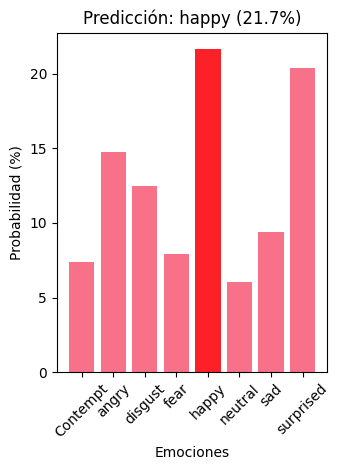

In [44]:
predicted_class_idx = np.argmax(prediction[0])
predicted_emotion = emotions[predicted_class_idx]
confidence = prediction[0][predicted_class_idx] * 100

print(f"Predicción para trump.jpg:")
print(f"Emoción detectada: {predicted_emotion}")
print(f"Confianza: {confidence:.2f}%")

# Mostrar todas las probabilidades
print(f"\nTodas las probabilidades:")
for i, emotion in enumerate(emotions):
    prob = prediction[0][i] * 100
    print(f"{emotion}: {prob:.2f}%")

# Crear gráfico de barras con las probabilidades
plt.subplot(1, 2, 2)
plt.bar(emotions, prediction[0] * 100)
plt.title(f'Predicción: {predicted_emotion} ({confidence:.1f}%)')
plt.xlabel('Emociones')
plt.ylabel('Probabilidad (%)')
plt.xticks(rotation=45)

# Resaltar la predicción más alta
max_idx = np.argmax(prediction[0])
plt.bar(emotions[max_idx], prediction[0][max_idx] * 100, color='red', alpha=0.7)

plt.tight_layout()
plt.show()